# Cats vs Dogs EDA

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [7]:
DATA_DIR = "..\\data\\raw"
cats_dir = os.path.join(DATA_DIR, "Cat")
dogs_dir = os.path.join(DATA_DIR, "Dog")

Count Images per Class

In [9]:
print("Number of cat images:", len(os.listdir(cats_dir)))
print("Number of dog images:", len(os.listdir(dogs_dir)))

Number of cat images: 12501
Number of dog images: 12501


Visualize Random Samples

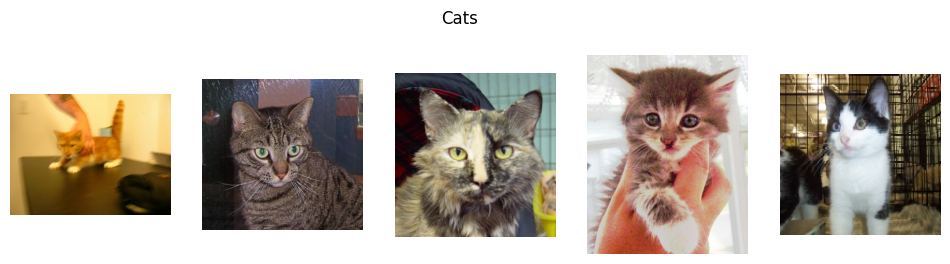

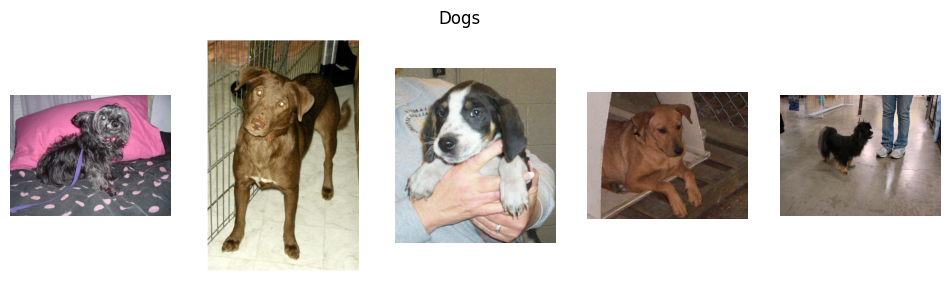

In [12]:
def show_samples(folder, title, n=5):
    plt.figure(figsize=(12, 3))
    files = os.listdir(folder)[:n]
    for i, fname in enumerate(files):
        img_path = os.path.join(folder, fname)
        try:
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis("off")
        except:
            print("Corrupted file:", img_path)
    plt.suptitle(title)
    plt.show()

show_samples(cats_dir, "Cats")
show_samples(dogs_dir, "Dogs")


Images often have different resolutions. Let's check.

In [18]:
cat_sizes = []
for fname in os.listdir(cats_dir)[:12501]:
    try:
        img = Image.open(os.path.join(cats_dir, fname))
        cat_sizes.append(img.size)
    except:
        pass

dog_sizes = []
for fname in os.listdir(dogs_dir)[:12501]:
    try:
        img = Image.open(os.path.join(dogs_dir, fname))
        dog_sizes.append(img.size)
    except:
        pass

print("Example cat sizes:", cat_sizes[:10])
print("Example dog sizes:", dog_sizes[:10])

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Example cat sizes: [(500, 375), (300, 281), (489, 500), (403, 500), (150, 150), (431, 360), (500, 375), (500, 471), (500, 375), (320, 240)]
Example dog sizes: [(500, 375), (327, 500), (269, 293), (500, 398), (500, 375), (263, 413), (110, 151), (500, 375), (432, 360), (500, 375)]


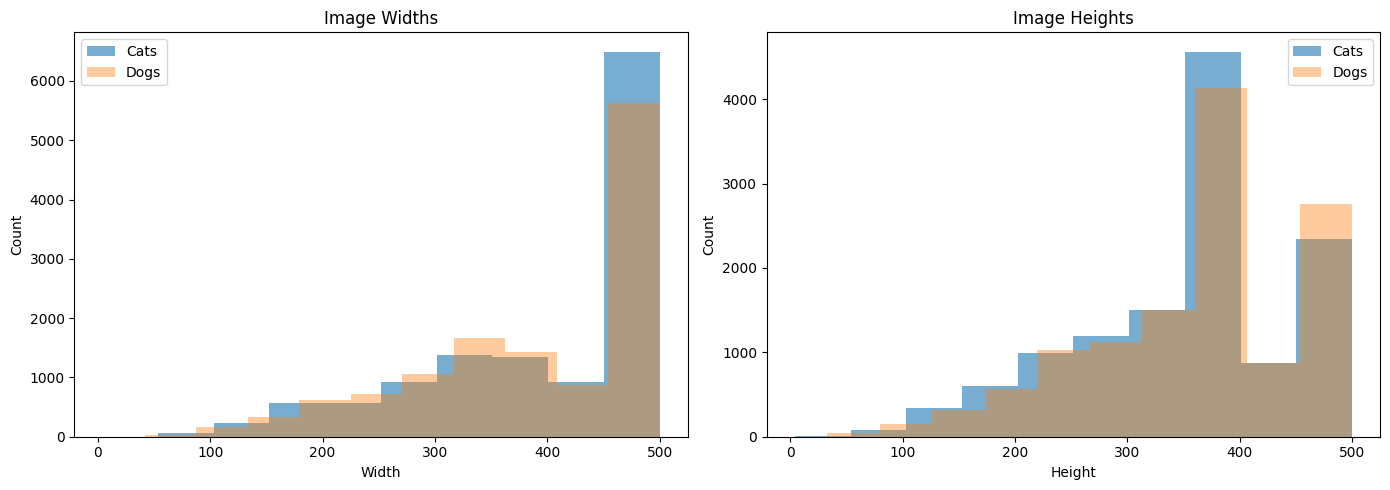

In [29]:
cat_widths, cat_heights = zip(*cat_sizes)
dog_widths, dog_heights = zip(*dog_sizes)

plt.figure(figsize=(14, 5))

# Subplot for widths
plt.subplot(1, 2, 1)
plt.hist(cat_widths, alpha=0.6, label="Cats")
plt.hist(dog_widths, alpha=0.4, label="Dogs")
plt.title("Image Widths")
plt.xlabel("Width")
plt.ylabel("Count")
plt.legend()

# Subplot for heights
plt.subplot(1, 2, 2)
plt.hist(cat_heights, alpha=0.6, label="Cats")
plt.hist(dog_heights, alpha=0.4, label="Dogs")
plt.title("Image Heights")
plt.xlabel("Height")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
print(f"Max cat width: {max(cat_widths)}")
print(f"Max dog width: {max(dog_widths)}")
print(f"Max cat height: {max(cat_heights)}")
print(f"Max dog height: {max(dog_heights)}")

print(f"Min cat width: {min(cat_widths)}")
print(f"Min dog width: {min(dog_widths)}")
print(f"Min cat height: {min(cat_heights)}")
print(f"Min dog height: {min(dog_heights)}")

Max cat width: 500
Max dog width: 500
Max cat height: 500
Max dog height: 500
Min cat width: 4
Min dog width: 42
Min cat height: 4
Min dog height: 33


Checking for corrupted files:

In [ ]:
def count_corrupted(folder):
    bad = 0
    for fname in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, fname))
            img.verify()
        except:
            bad += 1
    return bad

print("Corrupted cat images:", count_corrupted(cats_dir))
print("Corrupted dog images:", count_corrupted(dogs_dir))

Corrupted cat images: 2


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupted dog images: 2


In [32]:
def remove_corrupted(folder):
    removed = 0
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        try:
            img = Image.open(fpath)
            img.verify()
        except:
            print("Removing corrupted:", fpath)
            os.remove(fpath)
            removed += 1
    return removed

removed_cats = remove_corrupted(cats_dir)
removed_dogs = remove_corrupted(dogs_dir)

print(f"Removed {removed_cats} bad cat images and {removed_dogs} bad dog images.")

Removing corrupted: ..\data\raw\Cat\666.jpg
Removing corrupted: ..\data\raw\Cat\Thumbs.db
Removing corrupted: ..\data\raw\Dog\11702.jpg
Removing corrupted: ..\data\raw\Dog\Thumbs.db
Removed 2 bad cat images and 2 bad dog images.
